### What is Machine Learning
- We're trying to compute some function f(x) => y
- x is the example and y is some value that some output that we want
- we can train some function F in which in "predicts" the correct y
- our prediction y vs the correct y is what we are trying to decrease

### Machine learning is lots of algorithms but lets start with the most simple a basic in which we can nail down the fundamentals

### Linear regression
- Linear regression takes in the form of y = mx + b
- y is our prediction and x is out input, m is our weight (we can now interchange this to w) and b is our y-intercept/bias
- Trying to find the best weight w and bias b to correctly predict y is we need to do

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math


In [5]:
x_train = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])
y_train = np.array([17.592,   9.1302, 13.662,  11.854,   6.8233])

In [6]:
# 5 examples with 1 feature
print("x shape: ", x_train.shape)
print("y shape: ", y_train.shape)

x shape:  (5,)
y shape:  (5,)


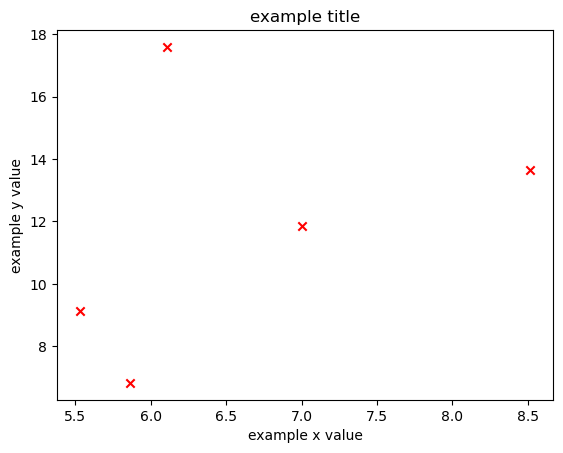

In [7]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('example title')
plt.ylabel('example y value')
plt.xlabel('example x value')
plt.show()

In [19]:
Math(r'f_{w,b}(x) = wx + b')

<IPython.core.display.Math object>

In [26]:
# things can be predicted by some function .... that takes in the weight and example + the bias
def linear_regression(x, w, b):
    return x * w + b 
m = x_train.shape[0]
weights = np.random.rand(m)
bias = 1
prediction = linear_regression(x_train, weights, bias)
print("prediction: ", prediction)

[0.52171209 0.03281817 0.30025288 0.12486049 0.10217981]
prediction:  [4.18771304 1.18140902 3.55773415 1.87442301 1.59875322]


In [35]:
# now we can compare with the predictions to y
cost = prediction - y_train
print("cost", cost)
# square it to keep away any negatives 
cost = cost**2
print("squared_cost: ", cost)

cost [-13.40428696  -7.94879098 -10.10426585  -9.97957699  -5.22454678]
squared_cost:  [179.67490901  63.18327804 102.09618842  99.59195696  27.29588901]


In [37]:
# computing the cost 
Math(r'J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}')

<IPython.core.display.Math object>

In [38]:
def compute_cost(x, y, w, b):
    total_cost = 0
    m = x.shape[0]
    for i in range(m):
        prediction = x[i]*w[i] + b
        current_cost = (prediction - y[i]) ** 2
        total_cost += current_cost
    total_cost /= m
    return total_cost

In [39]:
total_cost = compute_cost(x_train, y_train, weights, bias)
print(total_cost)


94.3684442882034


In [42]:
# the point is the use these smaller functions to get to gradient descent, where can do calculus ... slope where it is 0
Math(r'\frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})')

<IPython.core.display.Math object>

In [43]:
Math(r'\frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}')

<IPython.core.display.Math object>

In [44]:
# we do calculus to get the gradient of w and b.......in which we find where the slope is 0 ...
# ... once we get slope is 0...then the cost is reduced

In [45]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        prediction = w * x[i] + b
        dj_db += prediction - y[i]
        dj_dw = (prediction - y[i]) * x[i]
    dj_dw /= m
    dj_db /= m 
    return dj_dw, dj_db

In [ ]:
### now we need to converge to some w and b by using batch gradient descent

In [47]:
from IPython.display import Latex
Latex(r"""\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}""")

<IPython.core.display.Latex object>

- we keep doing iterations until we have trained b and w....
- alpha is the step size...if alpha is too large...it can overshoot ..thus not not getting to the slope of 0....
- if alpha is too small..it might take too long to train

In [48]:
import copy
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b =  b - alpha * dj_db

        if i<100000:      # prevent resource exhaustion 
            cost = cost_function(x, y, w, b)

    return w, b

In [49]:
# we get a trained w, b .... in which can now predict doing linear regression

w_trained, b_trained = 123, 123
x = 123
new_predicton = x * w_trained + b_trained 